### Real Estate Data Analysis

**Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

**reading data**

In [3]:

file_path = "real_estate_dataset_with_availability.csv"
df = pd.read_csv(file_path)
df

,Property_ID,City,Property_Type,Area_sqft,Bedrooms,Bathrooms,Parking,Year_Built,Price_Lakhs,Availability
0,1,Ahmedabad,Villa,2164,5,3,0,2001,127.88,Available in 6 Months
1,2,Hyderabad,Studio,1625,2,4,0,2019,314.26,Available in 6 Months
2,3,Chennai,Penthouse,1635,3,4,2,2022,321.57,Ready to Move
3,4,Ahmedabad,Penthouse,1429,2,4,1,2007,372.37,Available in 1 Year
4,5,Bangalore,Villa,3071,2,4,2,2003,318.02,Under Construction
...,...,...,...,...,...,...,...,...,...,...
2995,2996,Mumbai,Penthouse,924,5,3,0,2014,73.01,Under Construction
2996,2997,Bangalore,Villa,1287,5,3,1,2017,246.36,Under Construction
2997,2998,Chennai,Villa,607,5,4,0,2005,137.04,Ready to Move
2998,2999,Delhi,Villa,3782,3,4,2,2001,187.57,Under Construction


In [4]:
df.head()

,Property_ID,City,Property_Type,Area_sqft,Bedrooms,Bathrooms,Parking,Year_Built,Price_Lakhs,Availability
0,1,Ahmedabad,Villa,2164,5,3,0,2001,127.88,Available in 6 Months
1,2,Hyderabad,Studio,1625,2,4,0,2019,314.26,Available in 6 Months
2,3,Chennai,Penthouse,1635,3,4,2,2022,321.57,Ready to Move
3,4,Ahmedabad,Penthouse,1429,2,4,1,2007,372.37,Available in 1 Year
4,5,Bangalore,Villa,3071,2,4,2,2003,318.02,Under Construction


 ### **Data Processing and Cleaning**

In [5]:
df.shape

(3000, 10)

In [6]:
df.groupby('City')['Property_Type'].value_counts()

City       Property_Type    
Ahmedabad  Apartment            93
           Studio               77
           Villa                75
           Penthouse            63
           Independent House    60
Bangalore  Penthouse            82
           Independent House    75
           Studio               74
           Villa                67
           Apartment            65
Chennai    Independent House    91
           Villa                81
           Penthouse            76
           Studio               73
           Apartment            65
Delhi      Studio               87
           Penthouse            81
           Apartment            77
           Independent House    66
           Villa                66
Hyderabad  Penthouse            86
           Independent House    84
           Studio               71
           Apartment            70
           Villa                61
Kolkata    Studio               80
           Apartment            72
           Independent Hou

In [7]:
df.groupby('Availability').size()

Availability
Available in 1 Year      774
Available in 6 Months    720
Ready to Move            789
Under Construction       717
dtype: int64

In [8]:
# checking null values in the dataset
df.isnull().sum()

Property_ID      0
City             0
Property_Type    0
Area_sqft        0
Bedrooms         0
Bathrooms        0
Parking          0
Year_Built       0
Price_Lakhs      0
Availability     0
dtype: int64

In [9]:
df['Price_per_sqft']=(df['Price_Lakhs']*100000)/df['Area_sqft']

In [10]:
df

,Property_ID,City,Property_Type,Area_sqft,Bedrooms,Bathrooms,Parking,Year_Built,Price_Lakhs,Availability,Price_per_sqft
0,1,Ahmedabad,Villa,2164,5,3,0,2001,127.88,Available in 6 Months,5909.426987
1,2,Hyderabad,Studio,1625,2,4,0,2019,314.26,Available in 6 Months,19339.076923
2,3,Chennai,Penthouse,1635,3,4,2,2022,321.57,Ready to Move,19667.889908
3,4,Ahmedabad,Penthouse,1429,2,4,1,2007,372.37,Available in 1 Year,26058.082575
4,5,Bangalore,Villa,3071,2,4,2,2003,318.02,Under Construction,10355.584500
...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Mumbai,Penthouse,924,5,3,0,2014,73.01,Under Construction,7901.515152
2996,2997,Bangalore,Villa,1287,5,3,1,2017,246.36,Under Construction,19142.191142
2997,2998,Chennai,Villa,607,5,4,0,2005,137.04,Ready to Move,22576.606260
2998,2999,Delhi,Villa,3782,3,4,2,2001,187.57,Under Construction,4959.545214


In [11]:
#properties with more than 2000 area sqft 
large_property=df[df['Area_sqft']>2000]
large_property

,Property_ID,City,Property_Type,Area_sqft,Bedrooms,Bathrooms,Parking,Year_Built,Price_Lakhs,Availability,Price_per_sqft
0,1,Ahmedabad,Villa,2164,5,3,0,2001,127.88,Available in 6 Months,5909.426987
4,5,Bangalore,Villa,3071,2,4,2,2003,318.02,Under Construction,10355.584500
5,6,Kolkata,Apartment,2823,3,2,2,2011,485.24,Available in 6 Months,17188.806235
8,9,Ahmedabad,Villa,3577,1,1,2,2004,278.40,Available in 6 Months,7783.058429
11,12,Ahmedabad,Studio,3567,3,2,2,2022,202.68,Available in 1 Year,5682.085786
...,...,...,...,...,...,...,...,...,...,...,...
2985,2986,Pune,Penthouse,2189,3,4,1,2002,97.32,Ready to Move,4445.865692
2988,2989,Bangalore,Independent House,3103,5,3,1,2006,381.62,Available in 1 Year,12298.420883
2993,2994,Delhi,Studio,2494,1,1,0,2000,160.12,Available in 6 Months,6420.208500
2998,2999,Delhi,Villa,3782,3,4,2,2001,187.57,Under Construction,4959.545214


In [12]:
#peoperties with less than 2000 area sqft
small_property=df[df['Area_sqft']<2000]
small_property

,Property_ID,City,Property_Type,Area_sqft,Bedrooms,Bathrooms,Parking,Year_Built,Price_Lakhs,Availability,Price_per_sqft
1,2,Hyderabad,Studio,1625,2,4,0,2019,314.26,Available in 6 Months,19339.076923
2,3,Chennai,Penthouse,1635,3,4,2,2022,321.57,Ready to Move,19667.889908
3,4,Ahmedabad,Penthouse,1429,2,4,1,2007,372.37,Available in 1 Year,26058.082575
6,7,Chennai,Studio,846,1,1,0,2010,114.70,Available in 1 Year,13557.919622
7,8,Chennai,Penthouse,1234,3,3,1,1990,476.52,Ready to Move,38615.883306
...,...,...,...,...,...,...,...,...,...,...,...
2992,2993,Delhi,Penthouse,1347,5,2,0,1995,342.45,Ready to Move,25423.162584
2994,2995,Pune,Studio,1262,2,2,2,2007,255.05,Under Construction,20209.984152
2995,2996,Mumbai,Penthouse,924,5,3,0,2014,73.01,Under Construction,7901.515152
2996,2997,Bangalore,Villa,1287,5,3,1,2017,246.36,Under Construction,19142.191142


In [13]:
# top 50 low pricing properties from the dataset
df_sort=df.sort_values(by='Price_Lakhs',ascending=True).head(50)
df_sort

,Property_ID,City,Property_Type,Area_sqft,Bedrooms,Bathrooms,Parking,Year_Built,Price_Lakhs,Availability,Price_per_sqft
2147,2148,Chennai,Penthouse,1953,2,2,2,2017,20.12,Ready to Move,1030.209933
1301,1302,Hyderabad,Independent House,2448,4,4,2,2010,20.15,Under Construction,823.120915
1588,1589,Ahmedabad,Independent House,464,4,1,0,2010,20.16,Available in 1 Year,4344.827586
857,858,Bangalore,Apartment,2123,3,3,2,2021,20.27,Under Construction,954.780970
2775,2776,Hyderabad,Independent House,626,1,4,2,1990,20.41,Available in 6 Months,3260.383387
2895,2896,Ahmedabad,Apartment,623,5,2,0,2011,20.55,Ready to Move,3298.555377
408,409,Hyderabad,Independent House,2843,4,1,0,2010,20.63,Under Construction,725.641928
1927,1928,Bangalore,Penthouse,3066,1,2,2,1991,20.68,Available in 6 Months,674.494455
930,931,Ahmedabad,Penthouse,2985,4,4,2,2013,21.62,Ready to Move,724.288107
2908,2909,Hyderabad,Apartment,3341,3,4,0,1998,21.70,Available in 1 Year,649.506136


In [14]:
# to find the highest area sqft in the dataset
df['Area_sqft'].max()

3998

In [15]:
# lowest area sqft from the dataset
df['Area_sqft'].min()

401

In [16]:
## area sqft within 2500 to 4000 
df2=df[(df['Area_sqft']>=2500)&(df['Area_sqft']<=4000)]
df2

,Property_ID,City,Property_Type,Area_sqft,Bedrooms,Bathrooms,Parking,Year_Built,Price_Lakhs,Availability,Price_per_sqft
4,5,Bangalore,Villa,3071,2,4,2,2003,318.02,Under Construction,10355.584500
5,6,Kolkata,Apartment,2823,3,2,2,2011,485.24,Available in 6 Months,17188.806235
8,9,Ahmedabad,Villa,3577,1,1,2,2004,278.40,Available in 6 Months,7783.058429
11,12,Ahmedabad,Studio,3567,3,2,2,2022,202.68,Available in 1 Year,5682.085786
15,16,Chennai,Independent House,3296,2,1,2,2018,282.37,Under Construction,8567.050971
...,...,...,...,...,...,...,...,...,...,...,...
2982,2983,Mumbai,Villa,3497,3,4,2,2009,491.27,Ready to Move,14048.327138
2984,2985,Hyderabad,Penthouse,3732,3,3,2,2013,326.54,Available in 6 Months,8749.732047
2988,2989,Bangalore,Independent House,3103,5,3,1,2006,381.62,Available in 1 Year,12298.420883
2998,2999,Delhi,Villa,3782,3,4,2,2001,187.57,Under Construction,4959.545214


In [20]:
# Assuming your dataframe is named `df` and it has columns like 'city' and 'availability'

# Step 1: Group by city and availability status
availability_by_city = df.groupby(['City', 'Availability']).size().reset_index(name='property_count')

# Step 2: Pivot the table for better readability (optional)
pivot_table = availability_by_city.pivot(index='City', columns='Availability', values='property_count').fillna(0)

# Display the result
print(pivot_table)


Availability  Available in 1 Year  Available in 6 Months  Ready to Move  \
City                                                                      
Ahmedabad                     109                     84             93   
Bangalore                      85                     91             81   
Chennai                        97                     90             96   
Delhi                         110                     91             93   
Hyderabad                      79                    101            106   
Kolkata                       103                     84            100   
Mumbai                        103                     88            114   
Pune                           88                     91            106   

Availability  Under Construction  
City                              
Ahmedabad                     82  
Bangalore                    106  
Chennai                      103  
Delhi                         83  
Hyderabad                     86  
Kolk

## **DATA VISUALIZATION**

**Pie Chart**

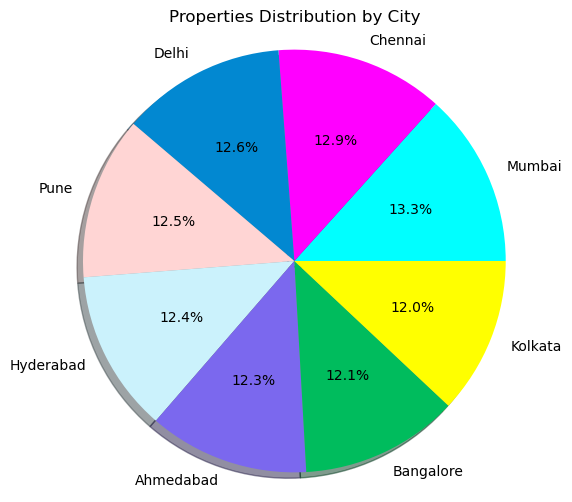

In [21]:
# To get the distribution of properties by metropolitian cities

city_counts = df['City'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(city_counts, labels=city_counts.index,colors=['#00FFFF','#FF00FF','#0288D1','#FFD5D4','#CBF2FC','#7B68EE','#00BC5D','#FFFF00'], autopct='%1.1f%%'
        ,startangle=0,shadow=True)
plt.title('Properties Distribution by City')
plt.axis('equal')
plt.show()

**Bar chart**

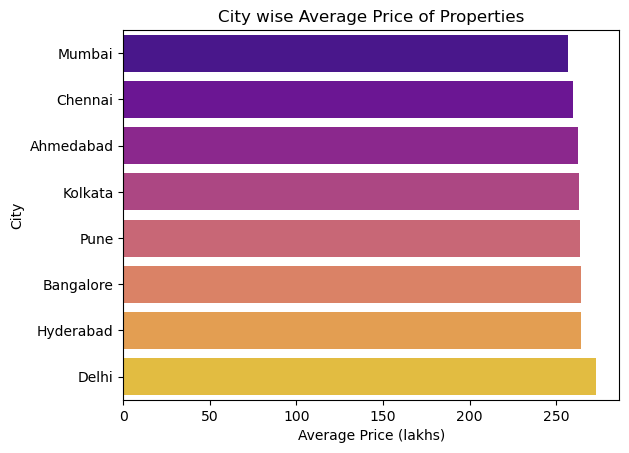

In [22]:
# avg property price per city in lakhs

city_avg=df.groupby('City')['Price_Lakhs'].mean().sort_values()
sns.barplot(x=city_avg.values,y=city_avg.index,orient='h',palette='plasma',hue=city_avg.index,legend=False)
plt.title('City wise Average Price of Properties')
plt.xlabel('Average Price (lakhs)')
plt.ylabel('City')
plt.show()

**Histplot**

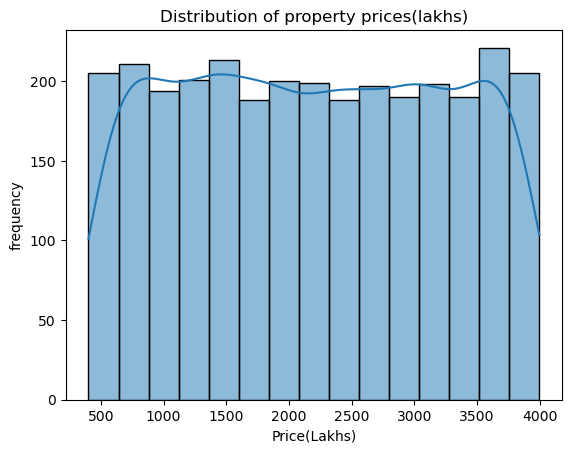

In [23]:

## It is used to visualize the frequency distribution of prices for assets in lakhs.
sns.histplot(df['Area_sqft'],kde=True)
plt.title('Distribution of property prices(lakhs)')
plt.xlabel('Price(Lakhs)')
plt.ylabel('frequency')
plt.show()

**Boxplot**

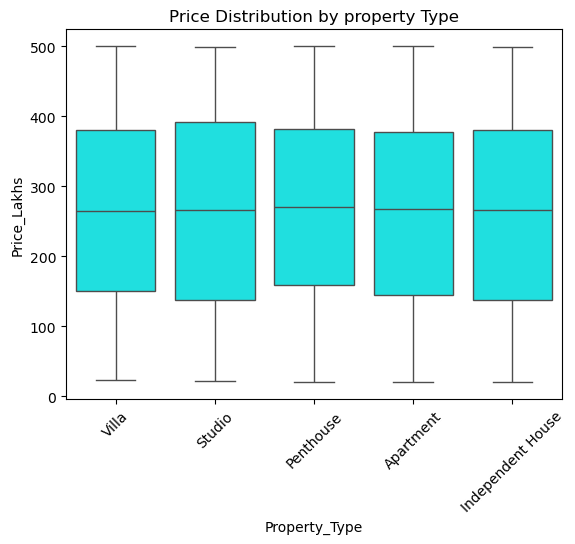

In [24]:
# Box plot - price distribution by property type
sns.boxplot(x='Property_Type',y='Price_Lakhs',data=df,color='cyan')
plt.title('Price Distribution by property Type')
plt.xticks(rotation=45)
plt.show()

**Count plot**

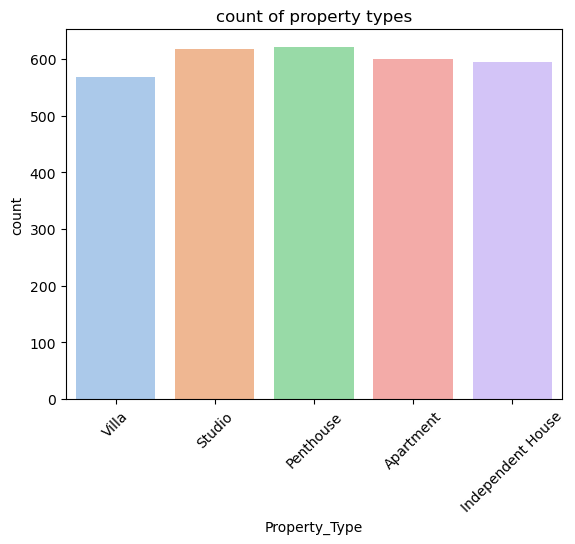

In [25]:
# count of different property types

sns.countplot(x='Property_Type',data=df,palette='pastel',hue='Property_Type')
plt.title('count of property types')
plt.xticks(rotation=45)
plt.show()

**Line chart**

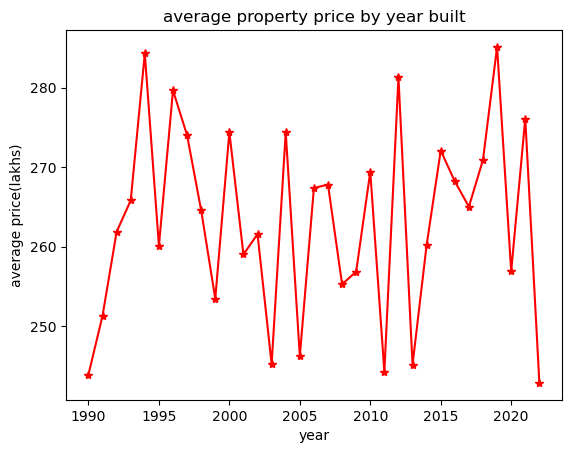

In [26]:
# average property price from year of built 

df.groupby('Year_Built')['Price_Lakhs'].mean().plot(kind='line',marker='*',color='#FF0000')
plt.title('average property price by year built')
plt.xlabel('year')
plt.ylabel('average price(lakhs)')

plt.show()

**Bar plot**

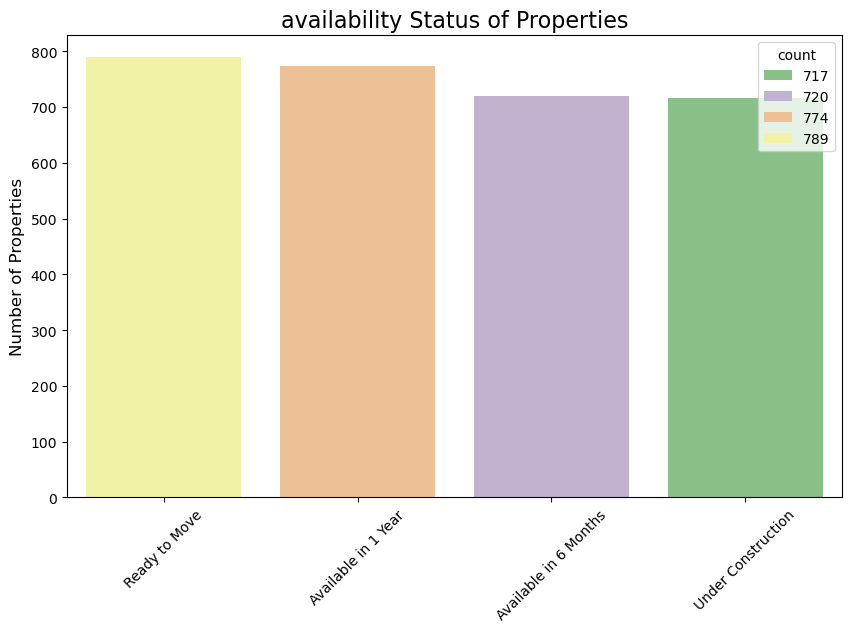

In [27]:
## Count of availability status from data 

availability_counts = df['Availability'].value_counts()
plt.figure(figsize=(10, 6))
availability=availability_counts.index
sns.barplot(x=availability, y=availability_counts,palette='Accent',hue=availability_counts)
plt.title('availability Status of Properties', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of Properties', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Scatter plot**

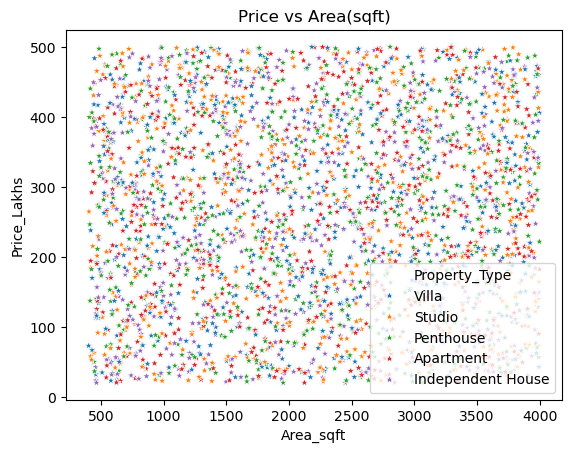

In [28]:
#Realtion between price and area sqft

sns.scatterplot(x='Area_sqft',y='Price_Lakhs',hue='Property_Type',data=df,marker='*')
plt.title('Price vs Area(sqft)')
plt.show()

**Catplot**

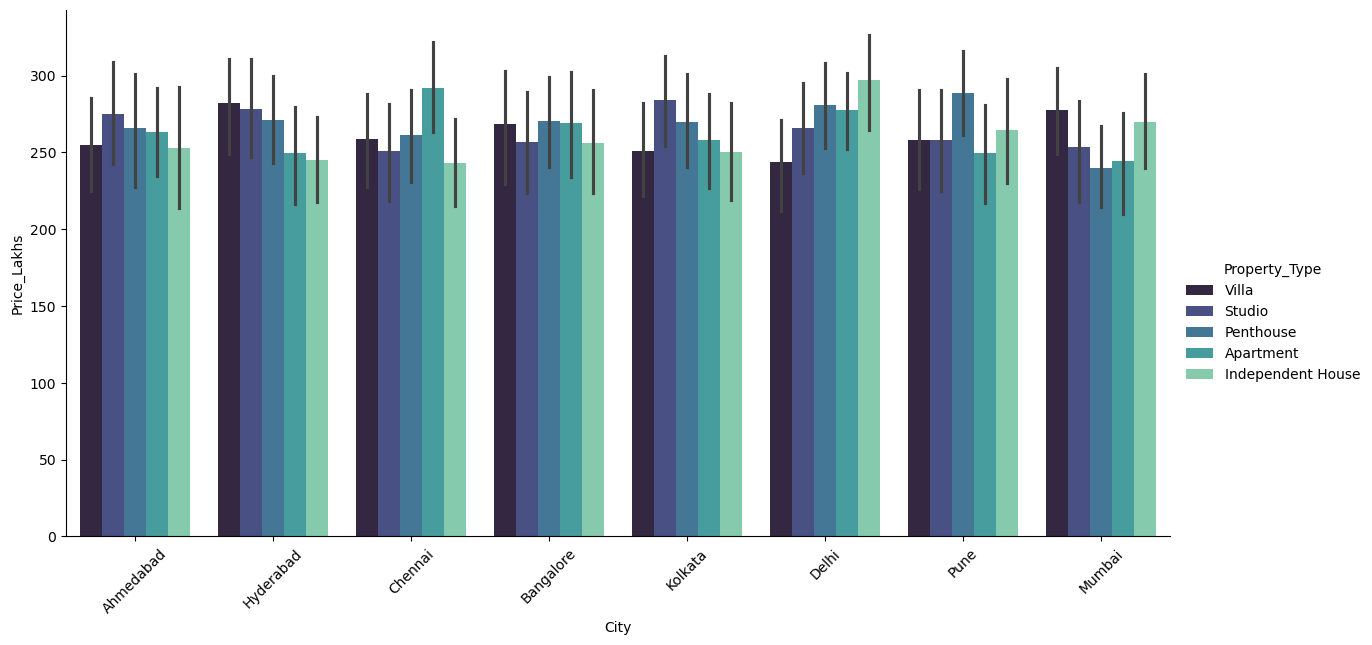

In [29]:
## Types of properties in different cities.

sns.catplot(x='City',y='Price_Lakhs',hue='Property_Type',kind='bar',data=df,height=6,aspect=2,palette='mako')
plt.xticks(rotation=45)
plt.show()

**Kde plot**

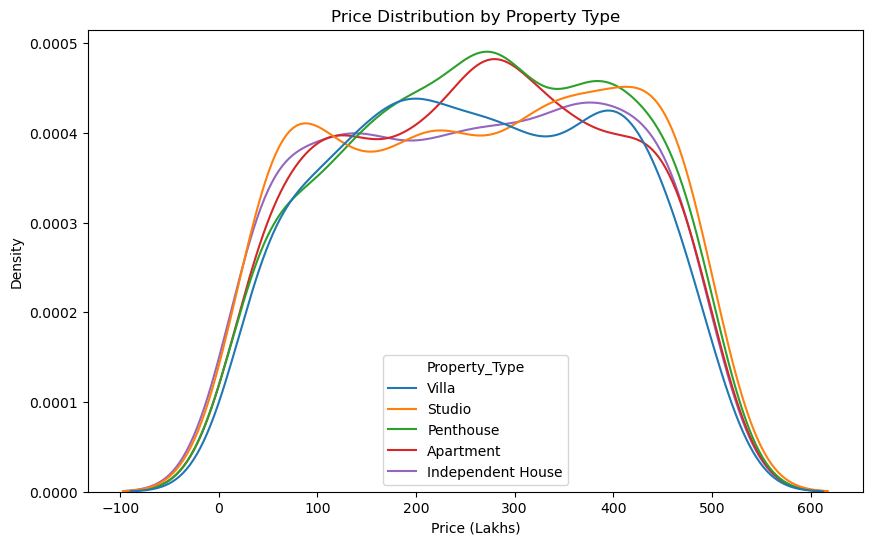

In [30]:
## for analyzing the distribution of property types based on density
# kde-kernel density estimation

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Price_Lakhs', hue='Property_Type')
plt.title('Price Distribution by Property Type')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Density')
plt.show()

**Heatmap**

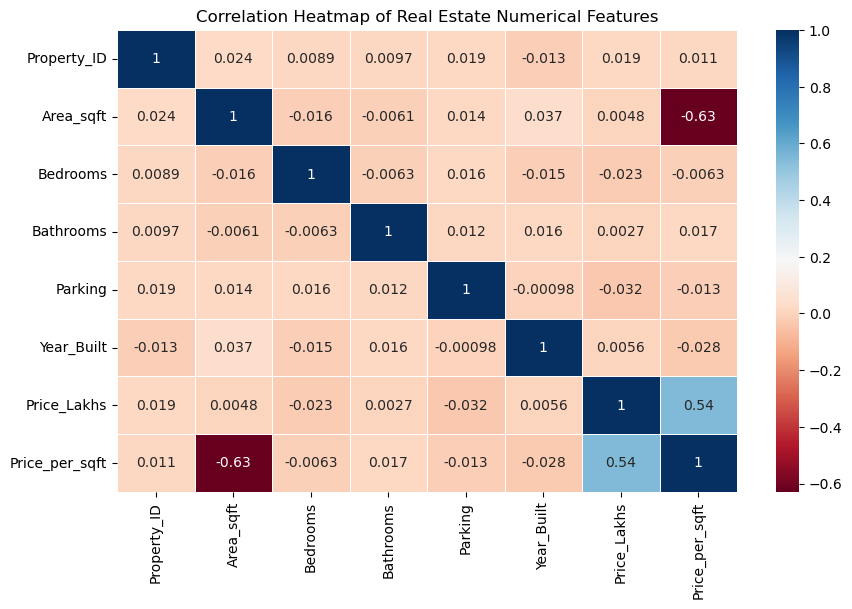

In [31]:
# defines the correaltion between numerical features
# 1 for positive correaltion, -1 for negative correaltion,0 for no correaltion.

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', linewidths=0.5)
plt.title('Correlation Heatmap of Real Estate Numerical Features')
plt.show()